<a href="https://colab.research.google.com/github/casperbh96/COVID-19-Detection/blob/master/Deep_Learning_for_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade tensorflow-gpu

In [0]:
# Update dataset: !git pull
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git dataset
image_folder = 'dataset/images/'
metadata = 'dataset/metadata.csv'

fatal: destination path 'dataset' already exists and is not an empty directory.


In [0]:
import pandas as pd

columns = ['finding', 'modality', 'filename']

# only use COVID-19 samples done with X-ray
df = pd.read_csv(metadata, usecols=columns)
df = df.loc[df['finding'] == 'COVID-19']
df = df.loc[df['modality'] == 'X-ray']

print(df.shape)
print(df.head(5))

(111, 3)
    finding modality                                           filename
0  COVID-19    X-ray  auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1  COVID-19    X-ray  auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2  COVID-19    X-ray  auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3  COVID-19    X-ray  auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4  COVID-19    X-ray                              nejmc2001573_f1a.jpeg


In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imutils import paths
import cv2, os

images = []
labels = []

for index, row in df.iterrows():
    # cv2 loads BGR colors by default, switch them to RGB
    # resize the image to 224, 224
    image = cv2.imread(image_folder + row.filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    images.append(image)

    label = row.finding
    labels.append(label)

# normalize images to be between 0 and 1
images = np.array(images) / 255.0
labels = np.array(labels)

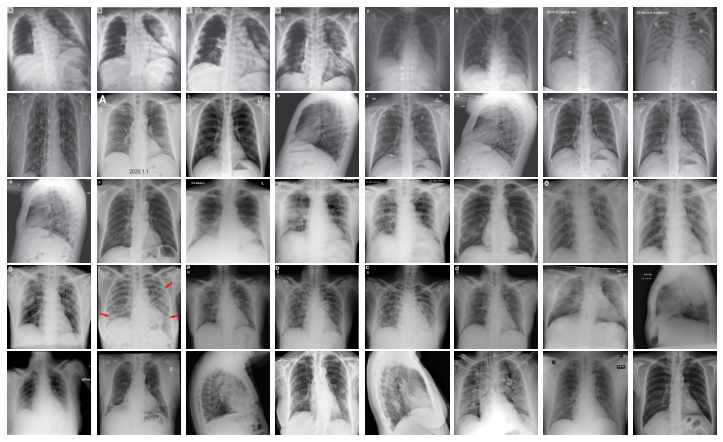

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

nrows, ncols = 5, 8
figsize = [10, 6]

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

for i, axi in enumerate(ax.flat):
    axi.imshow(images[i])
    axi.set_axis_off()

plt.tight_layout(pad=0.2)
plt.show()